In [ ]:
pip install autogluon

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [ ]:
import os
import pandas as pd
import warnings
from IPython.display import Image, display
warnings.filterwarnings('ignore')

In [ ]:
download_dir = './ag_automm_tutorial_img2img'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/Stanford_Online_Products.zip'
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

In [ ]:
dataset_path = os.path.join(download_dir, 'Stanford_Online_Products')
train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)
image_col_1 = "Image1"
image_col_2 = "Image2"
label_col = "Label"
match_label = 1

In [ ]:
def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

for image_col in [image_col_1, image_col_2]:
    train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
    test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

In [ ]:
train_data.head()

,Image1,Image2,Label
0,/content/ag_automm_tutorial_img2img/Stanford_O...,/content/ag_automm_tutorial_img2img/Stanford_O...,0
1,/content/ag_automm_tutorial_img2img/Stanford_O...,/content/ag_automm_tutorial_img2img/Stanford_O...,1
2,/content/ag_automm_tutorial_img2img/Stanford_O...,/content/ag_automm_tutorial_img2img/Stanford_O...,0
3,/content/ag_automm_tutorial_img2img/Stanford_O...,/content/ag_automm_tutorial_img2img/Stanford_O...,1
4,/content/ag_automm_tutorial_img2img/Stanford_O...,/content/ag_automm_tutorial_img2img/Stanford_O...,1


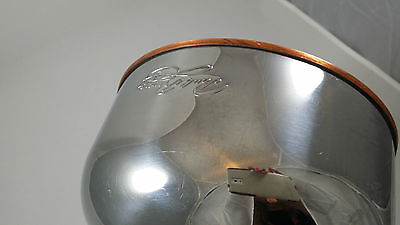

In [ ]:
pil_img = Image(filename=train_data[image_col_1][4])
display(pil_img)

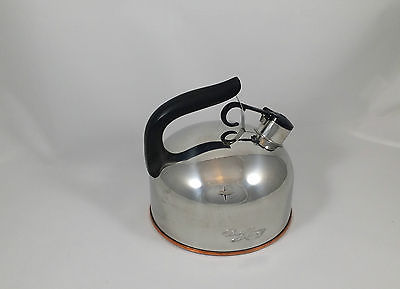

In [ ]:
pil_img = Image(filename=train_data[image_col_2][4])
display(pil_img)

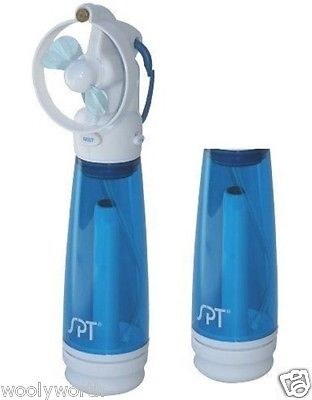

In [ ]:
pil_img = Image(filename=train_data[image_col_1][1])
display(pil_img)

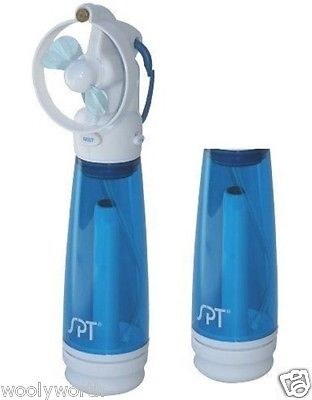

In [ ]:
pil_img = Image(filename=train_data[image_col_2][1])
display(pil_img)

In [ ]:
from autogluon.multimodal import MultiModalPredictor
predictor = MultiModalPredictor(
        problem_type="image_similarity",
        query=image_col_1, # the column name of the first image
        response=image_col_2, # the column name of the second image
        label=label_col, # the label column name
        match_label=match_label, # the label indicating that query and response have the same semantic meanings.
        eval_metric='auc', # the evaluation metric
    )

# Fit the model
predictor.fit(
    train_data=train_data,
    time_limit=180,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240926_062311"
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       12.1
Memory Avail:       10.45 GB / 12.67 GB (82.4%)
Disk Space Avail:   183.73 GB / 235.68 GB (78.0%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have install

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 1
GPU Count to be Used: 1
GPU 0 Name: Tesla T4
GPU 0 Memory: 0.25GB/15.0GB (Used/Total)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | Type                            | Params | Mode 
------------------------------------------------------------------------------
0 | query_model       | TimmAutoModelForImagePrediction | 93.3 M | train
1 | response_model    | TimmAutoModelForImagePrediction | 93.3 M | train
2 | validation_metric | BinaryAUROC                     | 0      | train
3 | loss_func         | ContrastiveLoss                 | 0      | train
4 | miner_func        | PairMarginMiner                 | 0      | train
------------------------------------------------------------------------------
93.3 M    Trainable params
0         Non-trainable params
93.3 M 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 15: 'val_roc_auc' reached 0.82776 (best 0.82776), saving model to '/content/AutogluonModels/ag-20240926_062311/epoch=0-step=15.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:03:00. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 18: 'val_roc_auc' reached 0.85504 (best 0.85504), saving model to '/content/AutogluonModels/ag-20240926_062311/epoch=0-step=18.ckpt' as top 3
Start to fuse 2 checkpoints via the greedy soup algorithm.


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20240926_062311")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
score = predictor.evaluate(test_data)
print("evaluation score: ", score)

Predicting: |          | 0/? [00:00<?, ?it/s]

evaluation score:  {'roc_auc': 0.8503114914410149}


In [ ]:
pred = predictor.predict(test_data.head(3))
print(pred)

Predicting: |          | 0/? [00:00<?, ?it/s]

0    1
1    1
2    1
Name: Label, dtype: int64


In [ ]:
proba = predictor.predict_proba(test_data.head(3))
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

          0         1
0  0.281685  0.718315
1  0.032517  0.967483
2  0.074559  0.925441


In [ ]:
embeddings_1 = predictor.extract_embedding({image_col_1: test_data[image_col_1][:4].tolist()})
print(embeddings_1.shape)
embeddings_2 = predictor.extract_embedding({image_col_2: test_data[image_col_2][:4].tolist()})
print(embeddings_2.shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(4, 768)


Predicting: |          | 0/? [00:00<?, ?it/s]

(4, 768)
